<a href="https://colab.research.google.com/github/fowardelcac/TensorFLow_Fcc/blob/main/2_RegresionNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/fowardelcac/TensorFLow_Fcc.git

Cloning into 'TensorFLow_Fcc'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 13 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (13/13), 9.96 KiB | 4.98 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [15]:
pip install ucimlrepo

In [43]:
import pathlib
from ucimlrepo import fetch_ucirepo

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [20]:
# fetch dataset
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X = auto_mpg.data.features
y = auto_mpg.data.targets

In [24]:
X.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [31]:
media = X.horsepower.mean()
X.loc['horsepower'] = X.horsepower.fillna(media).copy()

In [32]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [36]:
X.dropna(inplace=True)

<ipython-input-36-32f8c2353909>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


In [46]:
df = X.copy()
df['mpg'] = y.copy()
df

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
0,307.0,8.0,130.0,3504.0,12.0,70.0,1.0,18.0
1,350.0,8.0,165.0,3693.0,11.5,70.0,1.0,15.0
2,318.0,8.0,150.0,3436.0,11.0,70.0,1.0,18.0
3,304.0,8.0,150.0,3433.0,12.0,70.0,1.0,16.0
4,302.0,8.0,140.0,3449.0,10.5,70.0,1.0,17.0
...,...,...,...,...,...,...,...,...
393,140.0,4.0,86.0,2790.0,15.6,82.0,1.0,27.0
394,97.0,4.0,52.0,2130.0,24.6,82.0,2.0,44.0
395,135.0,4.0,84.0,2295.0,11.6,82.0,1.0,32.0
396,120.0,4.0,79.0,2625.0,18.6,82.0,1.0,28.0


In [48]:
scaler = Pipeline([
    ('min_max', MinMaxScaler())
])

df_scaled = scaler.fit_transform(df)
df_scaled

array([[0.61757106, 1.        , 0.45652174, ..., 0.        , 0.        ,
        0.2393617 ],
       [0.72868217, 1.        , 0.64673913, ..., 0.        , 0.        ,
        0.15957447],
       [0.64599483, 1.        , 0.56521739, ..., 0.        , 0.        ,
        0.2393617 ],
       ...,
       [0.17312661, 0.2       , 0.20652174, ..., 1.        , 0.        ,
        0.61170213],
       [0.13436693, 0.2       , 0.17934783, ..., 1.        , 0.        ,
        0.50531915],
       [0.13178295, 0.2       , 0.19565217, ..., 1.        , 0.        ,
        0.58510638]])

In [49]:
df_scaled_df = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled_df

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
0,0.617571,1.0,0.456522,0.536150,0.238095,0.0,0.0,0.239362
1,0.728682,1.0,0.646739,0.589736,0.208333,0.0,0.0,0.159574
2,0.645995,1.0,0.565217,0.516870,0.178571,0.0,0.0,0.239362
3,0.609819,1.0,0.565217,0.516019,0.238095,0.0,0.0,0.186170
4,0.604651,1.0,0.510870,0.520556,0.148810,0.0,0.0,0.212766
...,...,...,...,...,...,...,...,...
393,0.186047,0.2,0.217391,0.333711,0.452381,1.0,0.0,0.478723
394,0.074935,0.2,0.032609,0.146583,0.988095,1.0,0.5,0.930851
395,0.173127,0.2,0.206522,0.193365,0.214286,1.0,0.0,0.611702
396,0.134367,0.2,0.179348,0.286929,0.630952,1.0,0.0,0.505319


In [50]:
df_scaled_df.columns

Index(['displacement', 'cylinders', 'horsepower', 'weight', 'acceleration',
       'model_year', 'origin', 'mpg'],
      dtype='object')

In [51]:
X = df_scaled_df.drop('mpg', axis = 1)
y = df_scaled_df['mpg']

In [55]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid_test = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

In [65]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu', input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [66]:
model.compile(loss='mean_squared_error', optimizer='sgd')
model.fit(X_train, y_train, epochs=32, validation_data = (X_valid, y_valid_test))

Epoch 1/20
8/8 [==============================] - 1s 41ms/step - loss: 0.3156 - val_loss: 0.2097
Epoch 2/20
8/8 [==============================] - 0s 11ms/step - loss: 0.1455 - val_loss: 0.1106
Epoch 3/20
8/8 [==============================] - 0s 11ms/step - loss: 0.0784 - val_loss: 0.0679
Epoch 4/20
8/8 [==============================] - 0s 10ms/step - loss: 0.0499 - val_loss: 0.0478
Epoch 5/20
8/8 [==============================] - 0s 11ms/step - loss: 0.0369 - val_loss: 0.0379
Epoch 6/20
8/8 [==============================] - 0s 11ms/step - loss: 0.0303 - val_loss: 0.0321
Epoch 7/20
8/8 [==============================] - 0s 8ms/step - loss: 0.0266 - val_loss: 0.0284
Epoch 8/20
8/8 [==============================] - 0s 8ms/step - loss: 0.0241 - val_loss: 0.0259
Epoch 9/20
8/8 [==============================] - 0s 9ms/step - loss: 0.0223 - val_loss: 0.0240
Epoch 10/20
8/8 [==============================] - 0s 5ms/step - loss: 0.0209 - val_loss: 0.0226
Epoch 11/20
8/8 [================

In [67]:
model.evaluate(X_valid, y_valid_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.0167


0.016685698181390762

In [68]:
X_new = X_train[:3]
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 107ms/step


In [71]:
y_pred, y_train[:3]

(array([[0.31619117],
        [0.00894916],
        [0.53557825]], dtype=float32),
 61     0.319149
 103    0.053191
 302    0.678191
 Name: mpg, dtype: float64)

In [72]:
model.compile(loss='mean_squared_error', optimizer='sgd')
model.fit(X_train, y_train, epochs=32, validation_data = (X_valid, y_valid_test))

Epoch 1/32
8/8 [==============================] - 1s 24ms/step - loss: 0.0152 - val_loss: 0.0165
Epoch 2/32
8/8 [==============================] - 0s 6ms/step - loss: 0.0150 - val_loss: 0.0163
Epoch 3/32
8/8 [==============================] - 0s 6ms/step - loss: 0.0149 - val_loss: 0.0161
Epoch 4/32
8/8 [==============================] - 0s 6ms/step - loss: 0.0147 - val_loss: 0.0160
Epoch 5/32
8/8 [==============================] - 0s 9ms/step - loss: 0.0146 - val_loss: 0.0159
Epoch 6/32
8/8 [==============================] - 0s 6ms/step - loss: 0.0145 - val_loss: 0.0157
Epoch 7/32
8/8 [==============================] - 0s 8ms/step - loss: 0.0144 - val_loss: 0.0156
Epoch 8/32
8/8 [==============================] - 0s 6ms/step - loss: 0.0144 - val_loss: 0.0155
Epoch 9/32
8/8 [==============================] - 0s 6ms/step - loss: 0.0143 - val_loss: 0.0154
Epoch 10/32
8/8 [==============================] - 0s 6ms/step - loss: 0.0142 - val_loss: 0.0154
Epoch 11/32
8/8 [=====================

In [79]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu', input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss='mean_squared_error', optimizer='sgd')
model.fit(X_train, y_train, epochs=32, validation_data = (X_valid, y_valid_test))

Epoch 1/32
8/8 [==============================] - 1s 26ms/step - loss: 0.1686 - val_loss: 0.1234
Epoch 2/32
8/8 [==============================] - 0s 6ms/step - loss: 0.1008 - val_loss: 0.0847
Epoch 3/32
8/8 [==============================] - 0s 8ms/step - loss: 0.0728 - val_loss: 0.0664
Epoch 4/32
8/8 [==============================] - 0s 6ms/step - loss: 0.0589 - val_loss: 0.0558
Epoch 5/32
8/8 [==============================] - 0s 8ms/step - loss: 0.0505 - val_loss: 0.0487
Epoch 6/32
8/8 [==============================] - 0s 6ms/step - loss: 0.0446 - val_loss: 0.0432
Epoch 7/32
8/8 [==============================] - 0s 8ms/step - loss: 0.0397 - val_loss: 0.0387
Epoch 8/32
8/8 [==============================] - 0s 8ms/step - loss: 0.0358 - val_loss: 0.0349
Epoch 9/32
8/8 [==============================] - 0s 9ms/step - loss: 0.0324 - val_loss: 0.0317
Epoch 10/32
8/8 [==============================] - 0s 11ms/step - loss: 0.0295 - val_loss: 0.0289
Epoch 11/32
8/8 [====================

In [81]:
# Evaluating the model on the training set
train_loss = model.evaluate(X_train, y_train)

# Evaluating the model on the validation set
val_loss = model.evaluate(X_valid, y_valid_test)

# Print the evaluation results
print("Training Loss:", train_loss)
print("Validation Loss:", val_loss)

2/2 [==============================] - 0s 10ms/step - loss: 0.0112
Training Loss: 0.011107520200312138
Validation Loss: 0.01118556223809719


In [82]:
test_loss = model.evaluate(X_test, y_test)

# Print the test loss
print("Test Loss:", test_loss)

3/3 [==============================] - 0s 4ms/step - loss: 0.0089
Test Loss: 0.008882241323590279


In [ ]:
Training Loss: 0.011107520200312138
Validation Loss: 0.01118556223809719
Test Loss: 0.008882241323590279


Epoch 1/32
8/8 [==============================] - 0s 31ms/step - loss: 0.0111 - val_loss: 0.0111
Epoch 2/32
8/8 [==============================] - 0s 26ms/step - loss: 0.0109 - val_loss: 0.0109
Epoch 3/32
8/8 [==============================] - 0s 17ms/step - loss: 0.0108 - val_loss: 0.0108
Epoch 4/32
8/8 [==============================] - 0s 14ms/step - loss: 0.0107 - val_loss: 0.0107
Epoch 5/32
8/8 [==============================] - 0s 22ms/step - loss: 0.0106 - val_loss: 0.0107
Epoch 6/32
8/8 [==============================] - 0s 19ms/step - loss: 0.0105 - val_loss: 0.0106
Epoch 7/32
8/8 [==============================] - 0s 11ms/step - loss: 0.0104 - val_loss: 0.0105
Epoch 8/32
8/8 [==============================] - 0s 19ms/step - loss: 0.0103 - val_loss: 0.0104
Epoch 9/32
8/8 [==============================] - 0s 16ms/step - loss: 0.0102 - val_loss: 0.0104
Epoch 10/32
8/8 [==============================] - 0s 16ms/step - loss: 0.0102 - val_loss: 0.0103
Epoch 11/32
8/8 [============

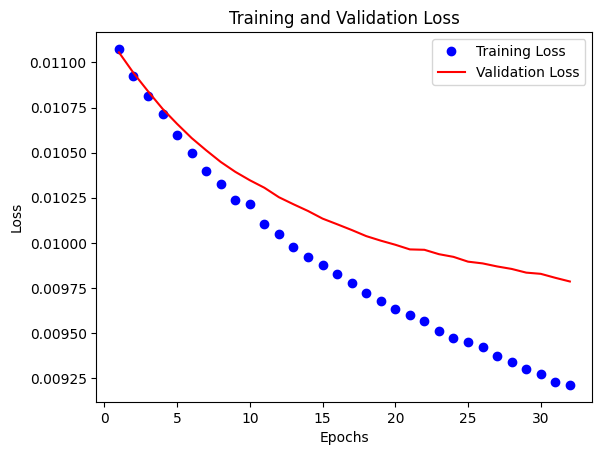

In [83]:
import matplotlib.pyplot as plt

# Accessing training history
history = model.fit(X_train, y_train, epochs=32, validation_data=(X_valid, y_valid_test))

# Extracting loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting learning curves
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

3/3 [==============================] - 0s 4ms/step - loss: 0.0072


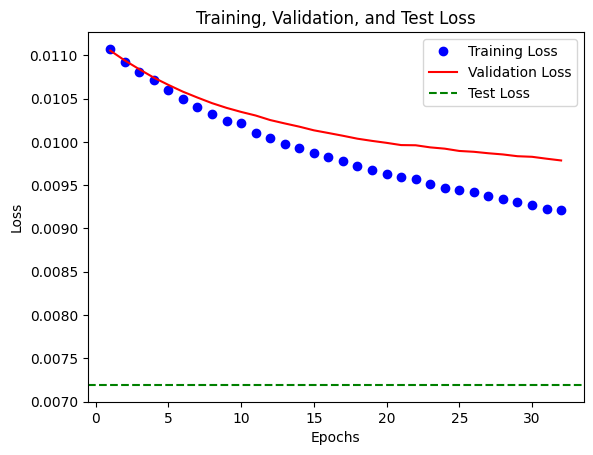

In [89]:
test_loss = model.evaluate(X_test, y_test)

# Plotting learning curves
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.axhline(y=test_loss, color='g', linestyle='--', label='Test Loss')
plt.title('Training, Validation, and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

It's not uncommon for the test loss to appear as a straight line, especially if it's consistently lower than the training and validation losses. This is because during evaluation on the test set, the model is not learning or adjusting its parameters; it's simply making predictions on unseen data. As a result, the loss may appear as a constant value over epochs, especially if the test set is relatively small.

The decreasing trend observed in the training and validation losses indicates that the model is learning and improving its performance over epochs. However, the fact that the test loss is consistently lower suggests that the model is generalizing well to unseen data. This is a positive sign, indicating that the model has learned patterns from the training data that also apply to unseen data.

While it's not unusual for the test loss to appear as a straight line, it's essential to interpret the results in the context of your specific problem and dataset. Additionally, you may want to explore other evaluation metrics and techniques to gain a more comprehensive understanding of your model's performance.

In [96]:
X_test[10:20]

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
9,0.832041,1.0,0.782609,0.634250,0.029762,0.000000,0.0
383,0.059432,0.2,0.114130,0.099802,0.416667,1.000000,1.0
56,0.059432,0.2,0.130435,0.096966,0.744048,0.083333,0.0
72,0.609819,1.0,0.565217,0.646158,0.267857,0.166667,0.0
132,0.186047,0.2,0.157609,0.263397,0.535714,0.333333,0.0
42,0.813953,1.0,0.728261,0.947547,0.208333,0.083333,0.0
370,0.113695,0.2,0.211957,0.272753,0.488095,1.000000,0.0
275,0.245478,0.6,0.429348,0.432946,0.333333,0.666667,0.5
229,0.857881,1.0,0.728261,0.739155,0.184524,0.583333,0.0
377,0.059432,0.2,0.119565,0.101219,0.571429,1.000000,1.0


In [106]:
import numpy as np

In [123]:
import numpy as np

y_label = np.array(y_test[:40]).reshape(-1, 1)

X_new_scaled = scaler.fit_transform(X_test[:40])

# Make predictions using the preprocessed data
predictions = model.predict(X_new_scaled)
predictions_original_scale = scaler.inverse_transform(predictions)

result = pd.DataFrame(predictions, columns=['y_predict'])
result['y_label'] = y_label
result

2/2 [==============================] - 0s 5ms/step


,y_predict,y_label
0,0.537297,0.638298
1,0.501965,0.505319
2,0.201348,0.265957
3,0.179532,0.106383
4,0.126753,0.132979
5,0.386829,0.478723
6,0.486852,0.398936
7,0.106138,0.106383
8,0.216733,0.212766
9,0.296147,0.319149
